### PS04 - preprocessing code

In [5]:
import sys
sys.path.append('/home/pshah/Documents/code/PackerLab_pycharm/')
import alloptical_utils_pj as aoutils


-----Processing trial # t-014-----
tiffs_loc_dir, naparms_loc, paqs_loc paths:
 [['/home/pshah/mnt/qnap/Data/2021-01-09/2021-01-09_t-014', '/home/pshah/mnt/qnap/Data/2021-01-09/2021-01-09_t-014/2021-01-09_t-014_Cycle00001_Ch3.tif', '/home/pshah/mnt/qnap/Data/2021-01-09/photostim/2021-01-09_PS04_020/', '/home/pshah/mnt/qnap/Data/2021-01-09/2021-01-09_PS04_014.paq', '/home/pshah/mnt/qnap/Analysis/2021-01-09/PS04/2021-01-09_t-014', '/home/pshah/mnt/qnap/Analysis/2021-01-0/paired_measurements/2021-01-09_PS04_014.mat']]
***** CREATING NEW TwoPhotonImaging with the following metainfo:  {'animal prep.': 'PS04', 'trial': 't-014', 'date': '2021-01-09', 'exptype': 'pre 4ap 2p all optical', 'data_path_base': '/home/pshah/mnt/qnap/Data/2021-01-09', 'comments': '14 cells x 2 groups; 7mW per cell preset: 250ms multi_interleaved 30 trials'}

-----parsing PV Metadata
n planes: 1 
n frames: 4968 
fps: 15.273308913654288 
frame size (px): 1024 x 1024 
zoom: 1.25 
pixel size (um): 0.873833917058156 0.87

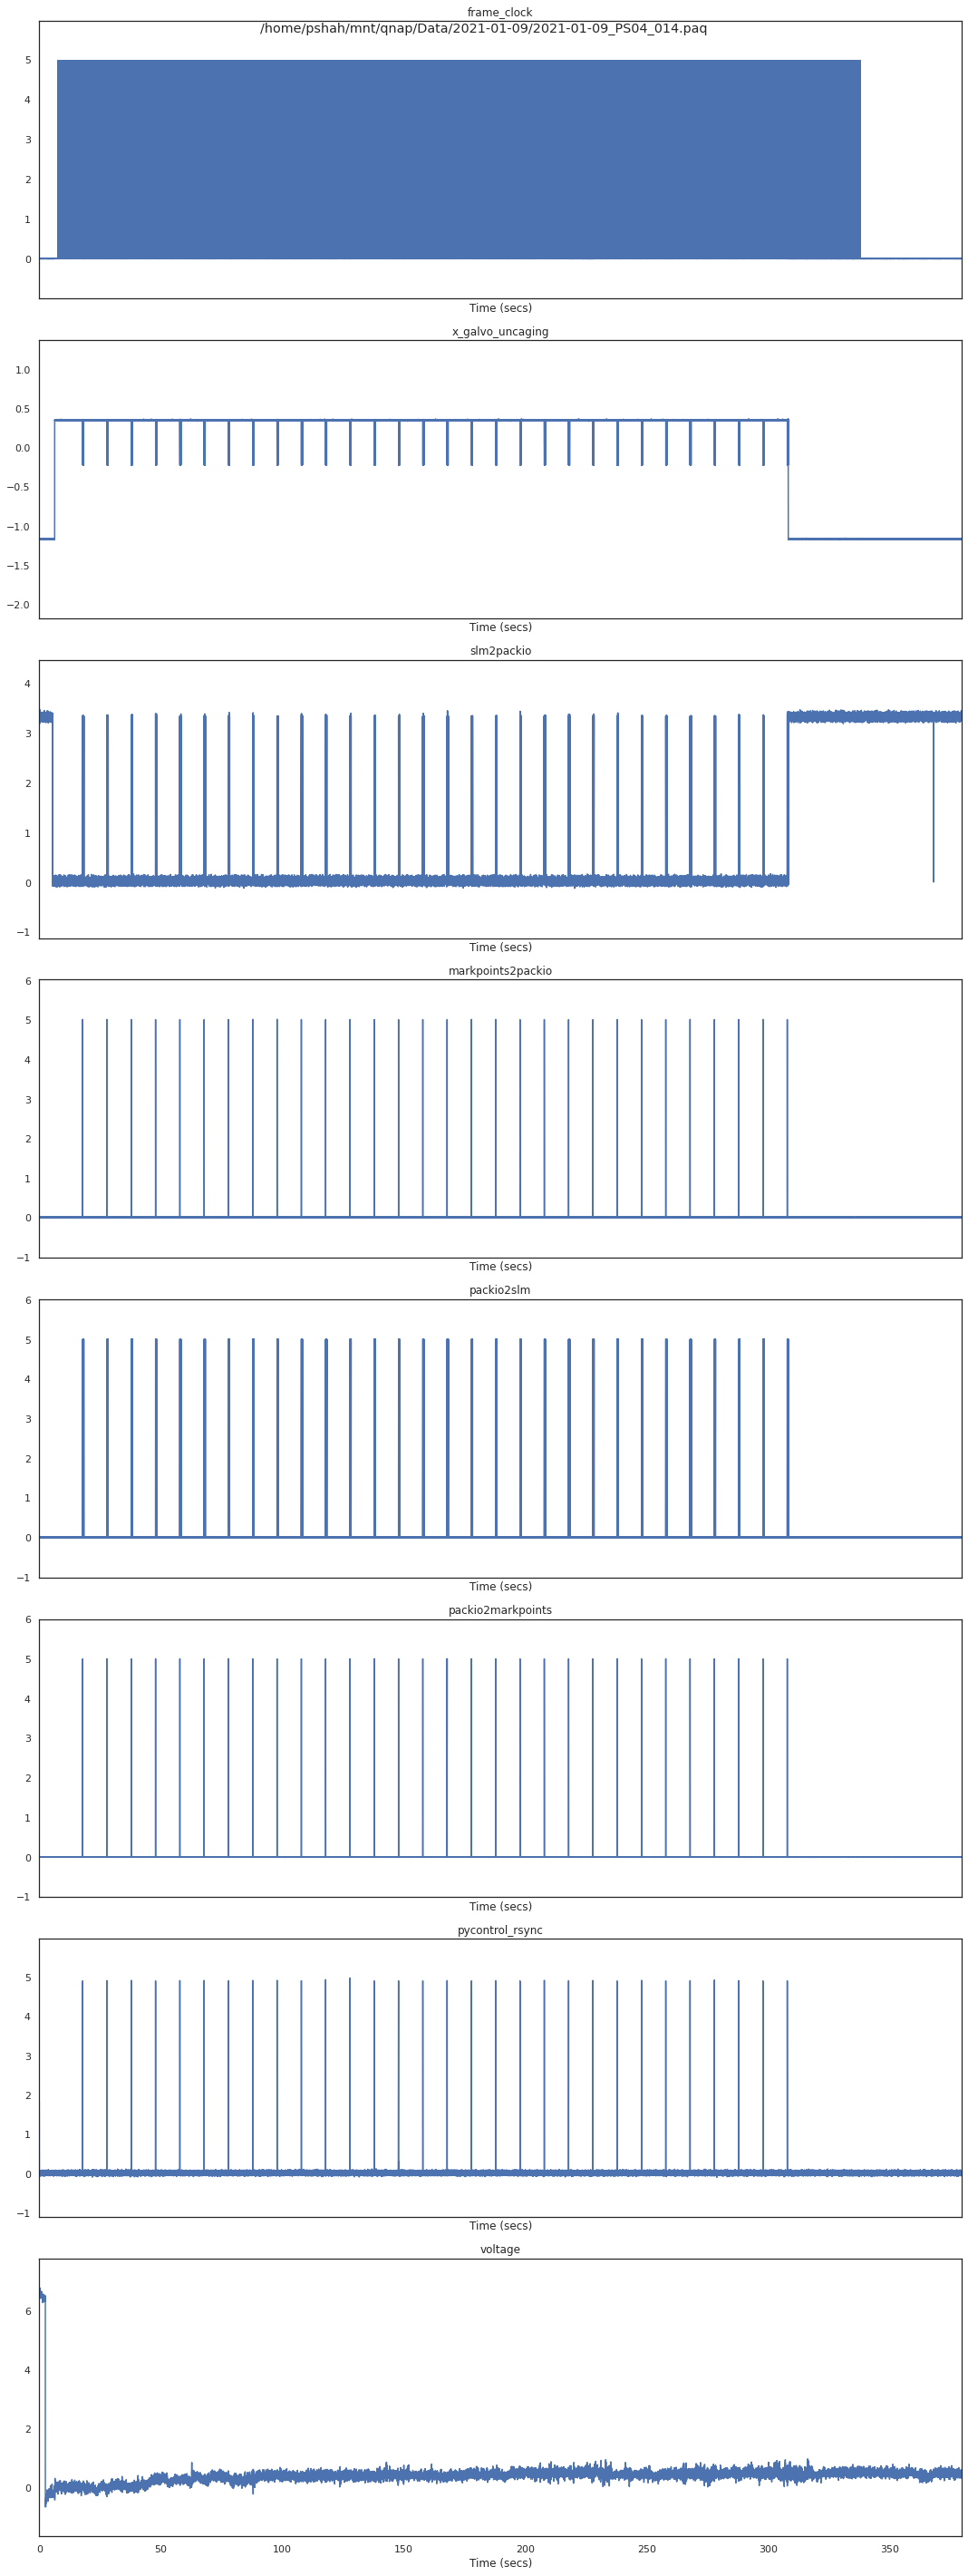

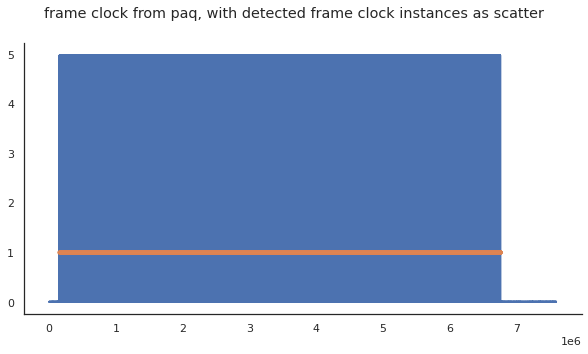

# of stims found on markpoints2packio: 30


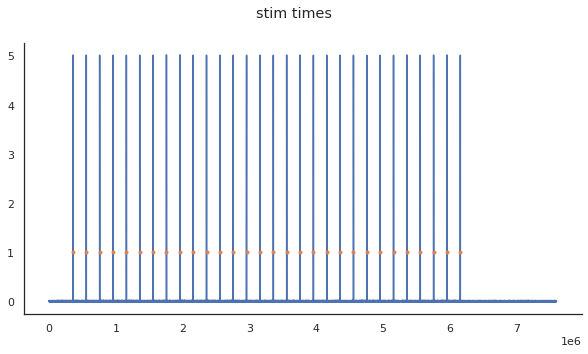


-----Loading up target coordinates...
Number of targets: 28
Number of targets (in SLM group 1):  14
Number of targets (in SLM group 2):  14
Got targets...

-----calculating photostimulation frames...
# of photostim frames calculated per stim. trial:  9
|-- Original # of frames: 4968 frames
|-- # of Photostim frames: 270 frames
|-- Minus photostim. frames total: 4698 frames


pkl saved to /home/pshah/mnt/qnap/Analysis/2021-01-09/PS04/2021-01-09_t-014/2021-01-09_t-014.pkl

***  Collected a total of  270 photostim + seizure/CSD frames +  additional bad frames to bad_frames.npy  ***

----- COMPLETED RUNNING run_photostim_processing() *******
{'animal prep.': 'PS04', 'trial': 't-014', 'date': '2021-01-09', 'exptype': 'pre 4ap 2p all optical', 'data_path_base': '/home/pshah/mnt/qnap/Data/2021-01-09', 'comments': '14 cells x 2 groups; 7mW per cell preset: 250ms multi_interleaved 30 trials'}


In [6]:
# Step #1) in all optical experiment analysis - preprocessing the data to prep for suite2p analysis and creating some starter experiment objects

# %% prepare trial and photostim experiment information below before running run_photostim_processing()
data_path_base = '/home/pshah/mnt/qnap/Data/2021-01-09'
animal_prep = 'PS04'
# date = '2021-02-02'
date = data_path_base[-10:]
# specify location of the naparm export for the trial(s) - ensure that this export was used for all trials, if # of trials > 1
# paqs_loc = '%s/%s_RL109_%s.paq' % (data_path_base, date, trial[2:])  # path to the .paq files for the selected trials

# need to update these 4 things for every trial
trial = 't-014'  # note that %s magic command in the code below will be using these trials listed here
comments = '14 cells x 2 groups; 7mW per cell preset: 250ms multi_interleaved 30 trials'
naparms_loc = '/photostim/2021-01-09_PS04_020/'  # make sure to include '/' at the end to indicate the child directory
exp_type = 'pre 4ap 2p all optical'  # use 'post' and '4ap' in the description to create the appropriate post4ap exp object
analysis_save_path = '/home/pshah/mnt/qnap/Analysis/%s/%s/' % (date, animal_prep)
# paqs_loc = '%s/%s_RL111_%s.paq' % (data_path_base, date, '008')  # path to the .paq files for the selected trials
######


paqs_loc = '%s/%s_%s_%s.paq' % (data_path_base, date, animal_prep, trial[2:])  # path to the .paq files for the selected trials
tiffs_loc_dir = '%s/%s_%s' % (data_path_base, date, trial)
analysis_save_path = analysis_save_path + tiffs_loc_dir[-16:]
tiffs_loc = '%s/%s_%s_Cycle00001_Ch3.tif' % (tiffs_loc_dir, date, trial)
pkl_path = "%s/%s_%s.pkl" % (analysis_save_path, date, trial)  # specify path in Analysis folder to save pkl object
# paqs_loc = '%s/%s_RL109_010.paq' % (data_path_base, date)  # path to the .paq files for the selected trials
new_tiffs = tiffs_loc[:-19]  # where new tiffs from rm_artifacts_tiffs will be saved
# make the necessary Analysis saving subfolder as well
# analysis_save_path = tiffs_loc[:21] + 'Analysis/' + tiffs_loc_dir[26:]

matlab_pairedmeasurements_path = '%s/paired_measurements/%s_%s_%s.mat' % (analysis_save_path[:-23], date, animal_prep, trial[2:])  # choose matlab path if need to use or use None for no additional bad frames
# matlab_pairedmeasurements_path = None

metainfo = {
    'animal prep.': animal_prep,
    'trial': trial,
    'date': date,
    'exptype': exp_type,
    'data_path_base': data_path_base,
    'comments': comments
}

expobj = aoutils.run_photostim_preprocessing(trial, exp_type=exp_type, pkl_path=pkl_path, new_tiffs=new_tiffs, metainfo=metainfo,
                                             tiffs_loc_dir=tiffs_loc_dir, tiffs_loc=tiffs_loc, naparms_loc=(data_path_base+naparms_loc),
                                             paqs_loc=paqs_loc, matlab_pairedmeasurements_path=matlab_pairedmeasurements_path,
                                             processed_tiffs=False, discard_all=True, analysis_save_path=analysis_save_path)
